In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('./prepared_df.csv')
data

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high
11989,0.33,0.65,3,172,10,0,0,1,marketing,high


In [4]:
data['left'].unique()

array([1, 0])

In [33]:
from sklearn.model_selection import train_test_split

df_enc = data.copy()

# Encoding the ordinal salary column

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

df_enc = pd.get_dummies(df_enc,drop_first=False)

percentile_25 = df_enc['tenure'].quantile(0.25)
percentile_75 = df_enc['tenure'].quantile(0.75)

iqr = percentile_75 - percentile_25

upper = (percentile_75 + 1.5) * iqr
lower = (percentile_25 - 1.5) * iqr

print(upper)
print(lower)

df_lr = df_enc[(df_enc['tenure'] >= lower) & (df_enc['tenure'] <= upper)]

5.5
1.5


In [34]:
len(df_lr.columns)

19

In [35]:
df_lr

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,0.72,0.64,4,192,3,0,0,0,1,False,False,False,False,False,False,False,True,False,False
11977,0.48,0.50,5,142,4,0,0,0,1,True,False,False,False,False,False,False,False,False,False
11978,0.19,0.79,4,229,4,0,0,0,1,False,False,False,False,False,False,True,False,False,False
11983,0.62,0.85,3,237,3,1,0,0,1,True,False,False,False,False,False,False,False,False,False


In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_lr['department_IT'] = le.fit_transform(df_lr['department_IT'])
df_lr['department_RandD'] = le.fit_transform(df_lr['department_RandD'])
df_lr['department_accounting'] = le.fit_transform(df_lr['department_accounting'])
df_lr['department_hr'] = le.fit_transform(df_lr['department_hr'])
df_lr['department_management'] = le.fit_transform(df_lr['department_management'])
df_lr['department_marketing'] = le.fit_transform(df_lr['department_marketing'])
df_lr['department_product_mng'] = le.fit_transform(df_lr['department_product_mng'])
df_lr['department_sales'] = le.fit_transform(df_lr['department_sales'])
df_lr['department_support'] = le.fit_transform(df_lr['department_support'])
df_lr['department_technical'] = le.fit_transform(df_lr['department_technical'])
# df_lr

C:\Users\user\AppData\Local\Temp\ipykernel_3896\4123102619.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lr['department_IT'] = le.fit_transform(df_lr['department_IT'])
C:\Users\user\AppData\Local\Temp\ipykernel_3896\4123102619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lr['department_RandD'] = le.fit_transform(df_lr['department_RandD'])
C:\Users\user\AppData\Local\Temp\ipykernel_3896\4123102619.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [59]:
df_lr['left'].value_counts()

left
0    9285
1    1882
Name: count, dtype: int64

<Figure size 2000x1500 with 0 Axes>

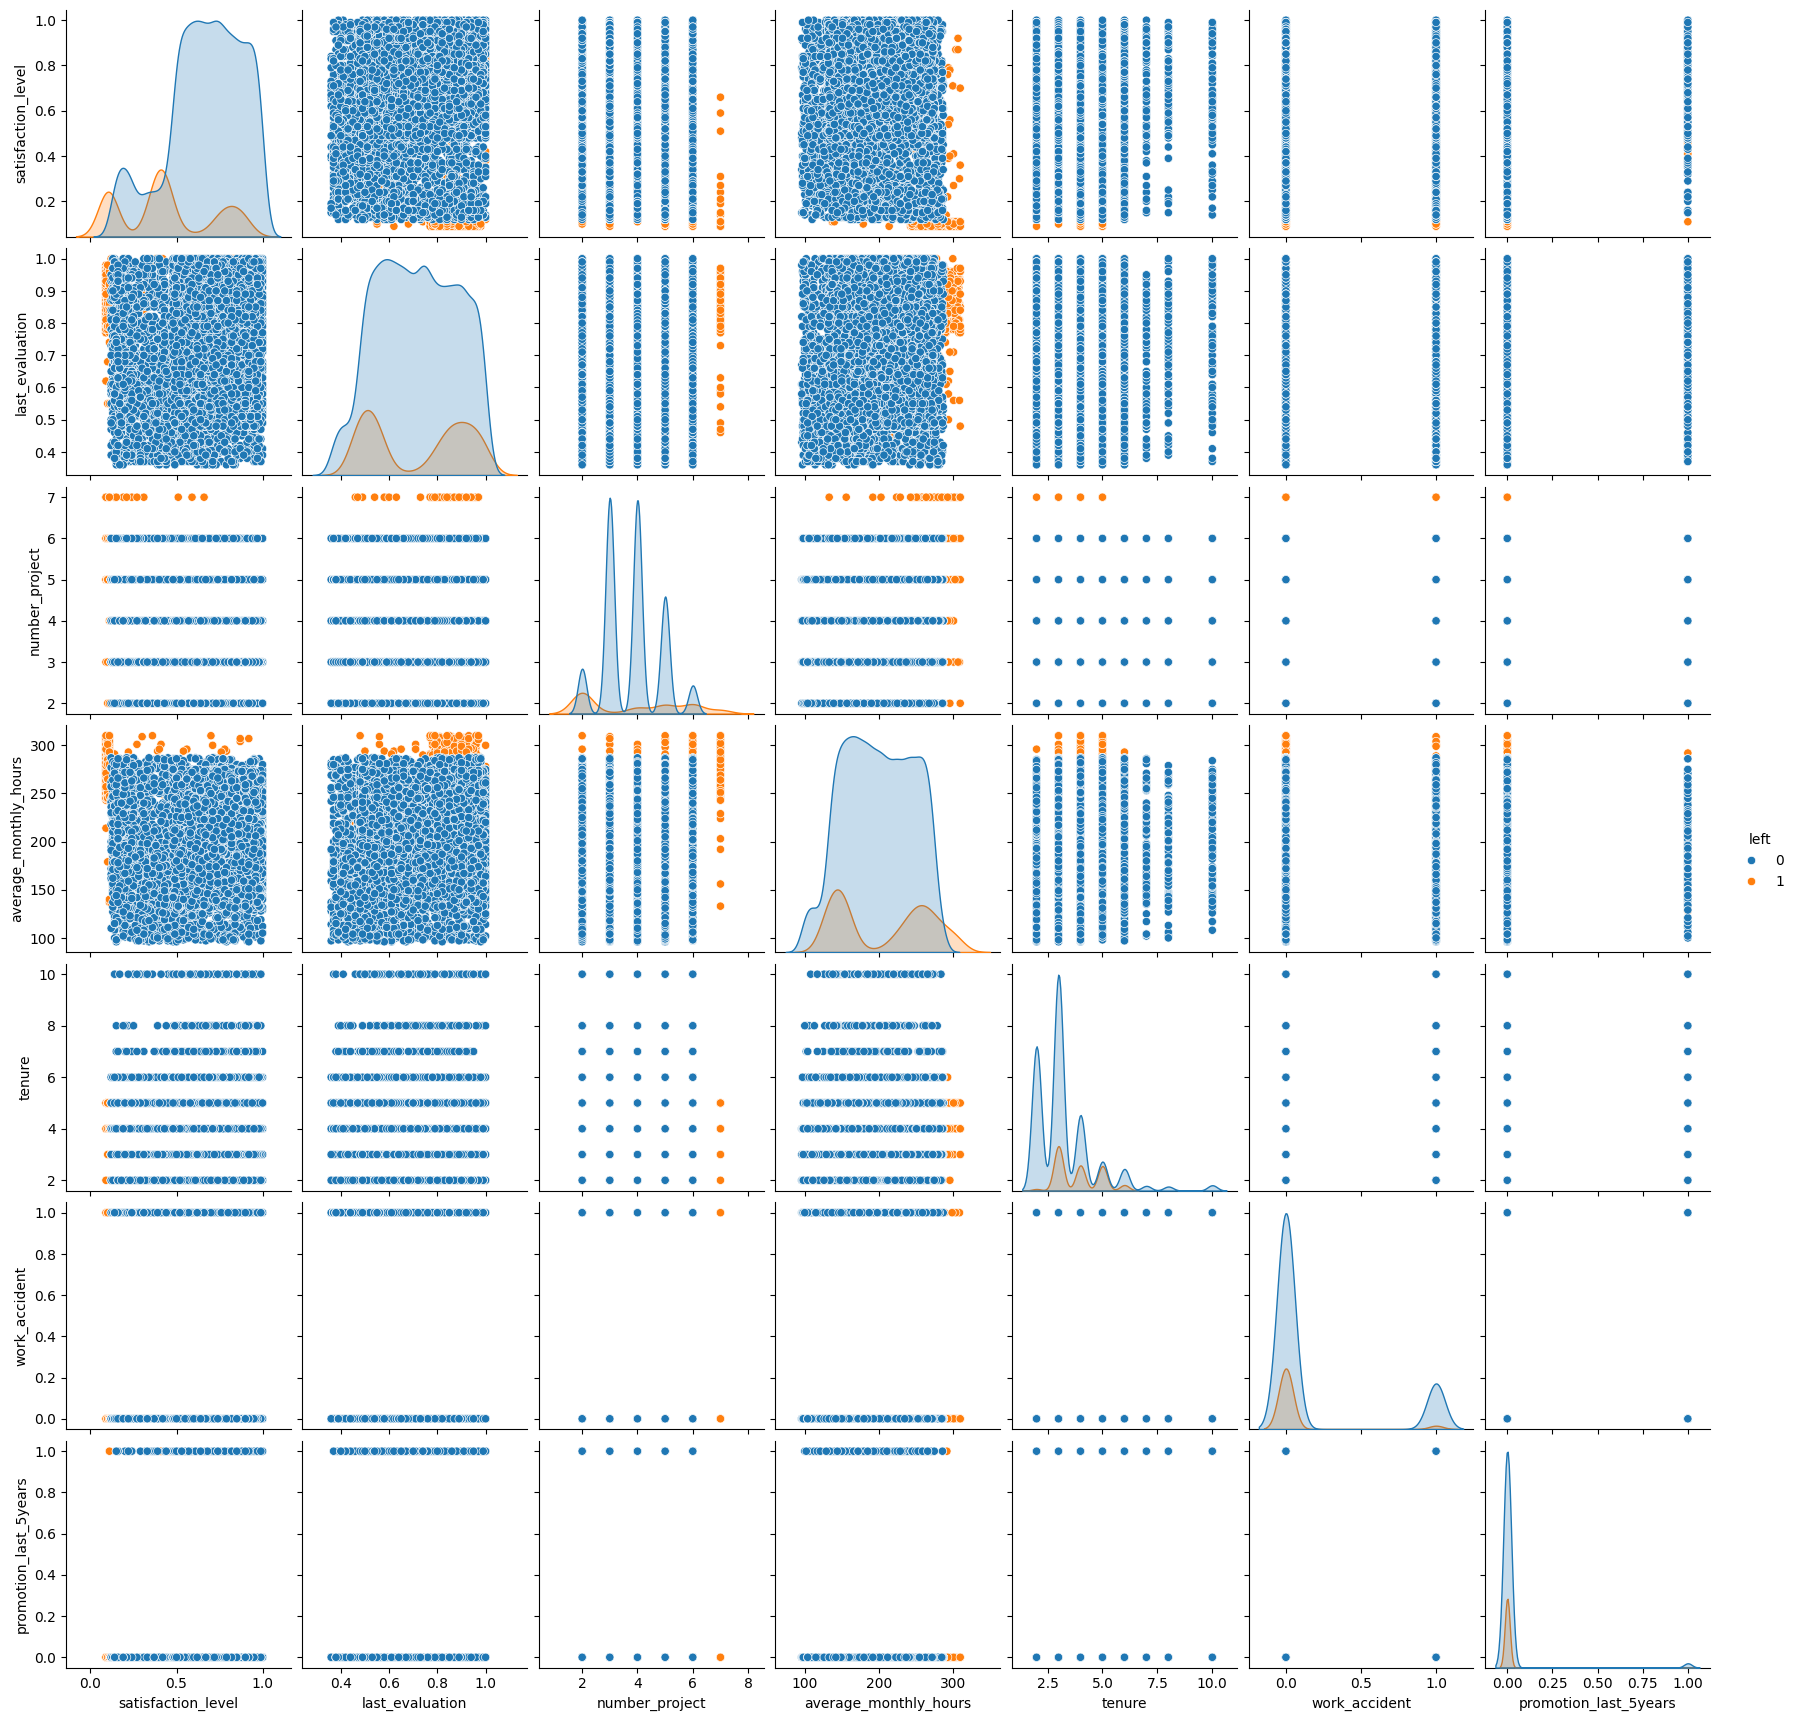

In [26]:
plt.figure(figsize=(20,15))

sns.pairplot(data=data, hue='left')
plt.show()

In [38]:
X = df_lr.drop('left',axis=1)
y = df_lr['left']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

### SVC


In [60]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf', degree=4)
svc_model.fit(X_train, y_train)

ytrain_svc_pred = svc_model.predict(X_train)
ytest_svc_pred = svc_model.predict(X_test)


In [62]:

print('train mse', mean_squared_error(y_train, ytrain_svc_pred)) # type:ignore
print('test mse', mean_squared_error(y_test, ytest_svc_pred), '\n') # type:ignore

print('train accuracy_score:', accuracy_score(y_train, ytrain_svc_pred))
print('test accuracy_score:', accuracy_score(y_test, ytest_svc_pred))

train mse 0.1684776119402985
test mse 0.16869627507163323 

train accuracy_score: 0.8315223880597015
test accuracy_score: 0.8313037249283668


In [65]:
df_lr['left'].value_counts()

left
0    9285
1    1882
Name: count, dtype: int64

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

print('train classification report\n', classification_report(y_train, ytrain_svc_pred))
print('test classification report\n',classification_report(y_test, ytest_svc_pred))

print('train confusion\n', confusion_matrix(y_train, ytrain_svc_pred))
print('test confusion\n', confusion_matrix(y_test, ytest_svc_pred))

c:\Users\user\Desktop\code\python\Content\ML\Classification\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\Desktop\code\python\Content\ML\Classification\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\Desktop\code\python\Content\ML\Classification\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

train classification report
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      6964
           1       0.00      0.00      0.00      1411

    accuracy                           0.83      8375
   macro avg       0.42      0.50      0.45      8375
weighted avg       0.69      0.83      0.76      8375

test classification report
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      2321
           1       0.00      0.00      0.00       471

    accuracy                           0.83      2792
   macro avg       0.42      0.50      0.45      2792
weighted avg       0.69      0.83      0.75      2792

train confusion
 [[6964    0]
 [1411    0]]
test confusion
 [[2321    0]
 [ 471    0]]


In [40]:
from sklearn.metrics import mean_squared_error, accuracy_score

print('train mse', mean_squared_error(y_train, ytrain_svc_pred)) # type:ignore
print('test mse', mean_squared_error(y_test, ytest_svc_pred), '\n') # type:ignore



print('train accuracy_score:', accuracy_score(y_train, ytrain_svc_pred))
print('test accuracy_score:', accuracy_score(y_test, ytest_svc_pred))

train mse 0.1684776119402985
test mse 0.16869627507163323 

train accuracy_score: 0.8315223880597015
test accuracy_score: 0.8313037249283668


### NAIVE BAYES

In [48]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

ytrain_naive_pred = naive_model.predict(X_train)
ytest_naive_pred = naive_model.predict(X_test)

In [66]:
print('train classification report\n', classification_report(y_train, ytrain_naive_pred))
print('test classification report\n',classification_report(y_test, ytest_naive_pred))

train classification report
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      6964
           1       0.55      0.79      0.65      1411

    accuracy                           0.86      8375
   macro avg       0.75      0.83      0.78      8375
weighted avg       0.89      0.86      0.87      8375

test classification report
               precision    recall  f1-score   support

           0       0.95      0.88      0.91      2321
           1       0.56      0.77      0.65       471

    accuracy                           0.86      2792
   macro avg       0.75      0.82      0.78      2792
weighted avg       0.88      0.86      0.87      2792



In [42]:
print('train mse', mean_squared_error(y_train, ytrain_naive_pred)) # type:ignore
print('test mse', mean_squared_error(y_test, ytest_naive_pred), '\n') # type:ignore


print('train accuracy score:', accuracy_score(y_train, ytrain_naive_pred))
print('test accuracy score:', accuracy_score(y_test, ytest_naive_pred))

train mse 0.14256716417910448
test mse 0.1414756446991404 

train accuracy score: 0.8574328358208955
test accuracy score: 0.8585243553008596


### CATEGORICAL

In [49]:
from sklearn.naive_bayes import CategoricalNB

cat_model = CategoricalNB()

cat_model.fit(X_train, y_train)

ytrain_cat_pred = cat_model.predict(X_train)
ytest_cat_pred = cat_model.predict(X_test)

In [50]:


print('train accuracy_score:', accuracy_score(y_train, ytrain_cat_pred))
print('test accuracy_score:', accuracy_score(y_test, ytest_cat_pred), '\n')

print('train mse:', mean_squared_error(y_train, ytrain_cat_pred))
print('test mse:', mean_squared_error(y_test, ytest_cat_pred))

train accuracy_score: 0.9237014925373135
test accuracy_score: 0.923352435530086 

train mse: 0.07629850746268657
test mse: 0.07664756446991404


In [67]:
print('train classification report\n', classification_report(y_train, ytrain_cat_pred))
print('test classification report\n',classification_report(y_test, ytest_cat_pred))

print()

train classification report
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      6964
           1       0.79      0.75      0.77      1411

    accuracy                           0.92      8375
   macro avg       0.87      0.85      0.86      8375
weighted avg       0.92      0.92      0.92      8375

test classification report
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2321
           1       0.78      0.75      0.77       471

    accuracy                           0.92      2792
   macro avg       0.87      0.85      0.86      2792
weighted avg       0.92      0.92      0.92      2792



### KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
ytrain_knn_pred = knn_model.predict(X_train)
ytest_knn_pred = knn_model.predict(X_test)

In [46]:
print('train accuracy_score:', accuracy_score(y_train, ytrain_knn_pred))
print('test accuracy_score:', accuracy_score(y_test, ytest_knn_pred), '\n')

print('train mse:', mean_squared_error(y_train, ytrain_knn_pred))
print('test mse:', mean_squared_error(y_test, ytest_knn_pred))

train accuracy_score: 0.9622686567164179
test accuracy_score: 0.9498567335243553 

train mse: 0.03773134328358209
test mse: 0.050143266475644696


### DESICION TREE

In [53]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()

tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [56]:
ytrain_tree_pred = tree_model.predict(X_train)
ytest_tree_pred = tree_model.predict(X_test)

In [58]:
print('train accuracy_score:', accuracy_score(y_train, ytrain_tree_pred))
print('test accuracy_score:', accuracy_score(y_test, ytest_tree_pred), '\n')

print('train mse:', mean_squared_error(y_train, ytrain_tree_pred))
print('test mse:', mean_squared_error(y_test, ytest_tree_pred))

train accuracy_score: 1.0
test accuracy_score: 0.9717048710601719 

train mse: 0.0
test mse: 0.02829512893982808


[Text(0.46867180140131887, 0.9761904761904762, 'x[0] <= 0.465\ngini = 0.28\nsamples = 8375\nvalue = [6964, 1411]'),
 Text(0.1555434526613283, 0.9285714285714286, 'x[2] <= 2.5\ngini = 0.497\nsamples = 1963\nvalue = [908, 1055]'),
 Text(0.31210762703132355, 0.9523809523809523, 'True  '),
 Text(0.046161092793217146, 0.8809523809523809, 'x[1] <= 0.575\ngini = 0.29\nsamples = 768\nvalue = [135, 633]'),
 Text(0.022609514837494113, 0.8333333333333334, 'x[1] <= 0.44\ngini = 0.136\nsamples = 680\nvalue = [50, 630]'),
 Text(0.018841262364578427, 0.7857142857142857, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.0263777673104098, 0.7857142857142857, 'x[3] <= 162.0\ngini = 0.079\nsamples = 657\nvalue = [27, 630]'),
 Text(0.015073009891662742, 0.7380952380952381, 'x[3] <= 125.5\ngini = 0.043\nsamples = 641\nvalue = [14, 627]'),
 Text(0.011304757418747056, 0.6904761904761905, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.018841262364578427, 0.6904761904761905, 'x[0] <= 0.34\ngini = 0.02

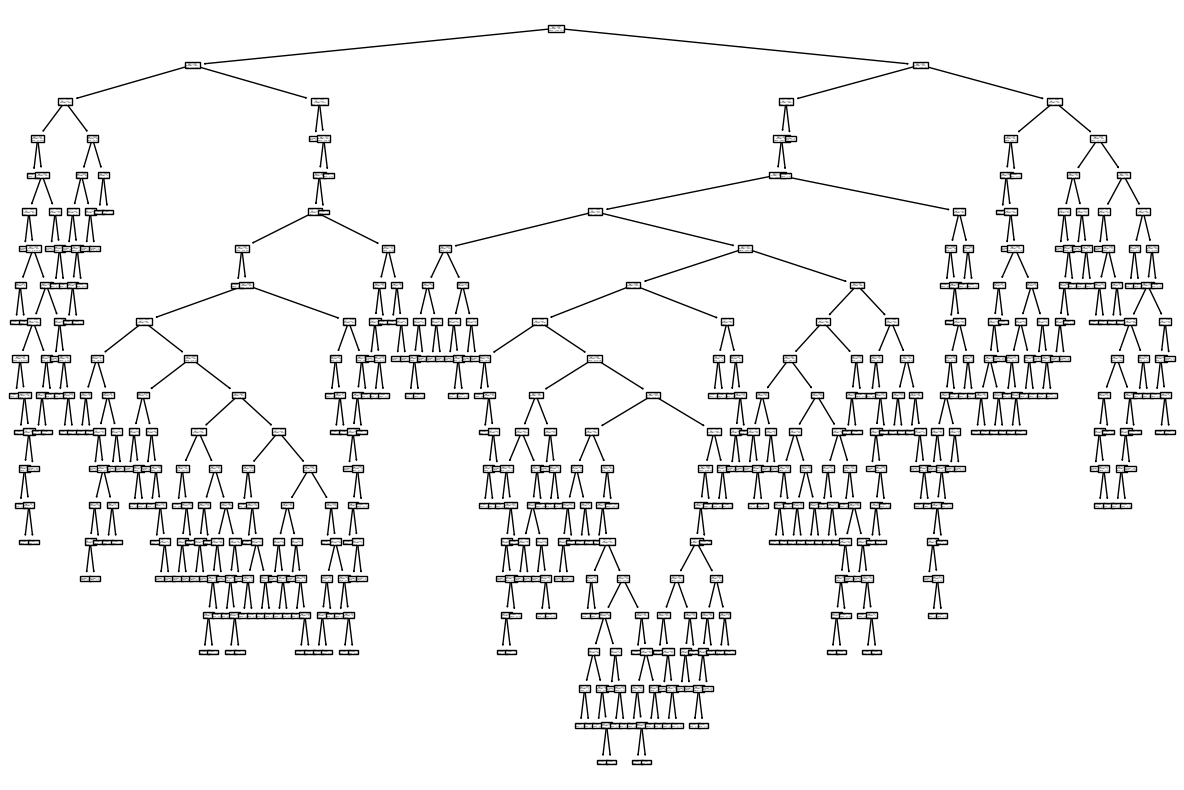

In [55]:
plt.figure(figsize=(15,10))
tree.plot_tree(tree_model)

### BAGGING - RANDOM FOREST

In [78]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()

forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
ytrain_forest_pred = forest_model.predict(X_train)
ytest_forest_pred = forest_model.predict(X_test)

In [82]:
print('train classification report \n', classification_report(y_train, ytrain_forest_pred))
print('test confusion matrix \n', classification_report(y_test, ytest_forest_pred))

print('train classsification report \n', confusion_matrix(y_train ,ytrain_forest_pred))
print('test confusion matrix \n', confusion_matrix(y_test ,ytest_forest_pred))

train classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6964
           1       1.00      1.00      1.00      1411

    accuracy                           1.00      8375
   macro avg       1.00      1.00      1.00      8375
weighted avg       1.00      1.00      1.00      8375

test confusion matrix 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2321
           1       0.99      0.93      0.96       471

    accuracy                           0.99      2792
   macro avg       0.99      0.96      0.98      2792
weighted avg       0.99      0.99      0.99      2792

train classsification report 
 [[6964    0]
 [   0 1411]]
test confusion matrix 
 [[2317    4]
 [  34  437]]


### BAGGING - CategoricalNB

In [83]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(estimator=CategoricalNB())

bagging_model.fit(X_train, y_train)

ytrain_bagging_pred = bagging_model.predict(X_train)
ytest_bagging_pred = bagging_model.predict(X_test)


In [84]:
print('train classification report \n', classification_report(y_train, ytrain_bagging_pred))
print('test confusion matrix \n', classification_report(y_test, ytest_bagging_pred))

print('train classsification report \n', confusion_matrix(y_train ,ytrain_bagging_pred))
print('test confusion matrix \n', confusion_matrix(y_test ,ytest_bagging_pred))

train classification report 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      6964
           1       0.79      0.75      0.77      1411

    accuracy                           0.92      8375
   macro avg       0.87      0.86      0.86      8375
weighted avg       0.92      0.92      0.92      8375

test confusion matrix 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      2321
           1       0.80      0.73      0.76       471

    accuracy                           0.92      2792
   macro avg       0.87      0.85      0.86      2792
weighted avg       0.92      0.92      0.92      2792

train classsification report 
 [[6687  277]
 [ 353 1058]]
test confusion matrix 
 [[2233   88]
 [ 127  344]]


### BOOSTING

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

boost_model = GradientBoostingClassifier()

boost_model.fit(X_train, y_train)

ytrain_boost_pred = boost_model.predict(X_train)
ytest_boost_pred = boost_model.predict(X_test)

In [86]:
print('train classification report \n', classification_report(y_train, ytrain_boost_pred))
print('test confusion matrix \n', classification_report(y_test, ytest_boost_pred))

print('train classsification report \n', confusion_matrix(y_train ,ytrain_boost_pred))
print('test confusion matrix \n', confusion_matrix(y_test ,ytest_boost_pred))

train classification report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6964
           1       0.97      0.93      0.95      1411

    accuracy                           0.98      8375
   macro avg       0.98      0.96      0.97      8375
weighted avg       0.98      0.98      0.98      8375

test confusion matrix 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2321
           1       0.97      0.94      0.95       471

    accuracy                           0.98      2792
   macro avg       0.98      0.97      0.97      2792
weighted avg       0.98      0.98      0.98      2792

train classsification report 
 [[6922   42]
 [ 105 1306]]
test confusion matrix 
 [[2305   16]
 [  28  443]]


### STACKING

In [87]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', LinearSVC(random_state=42))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train).score(X_test, y_test)

0.9849570200573066

In [90]:
ytrain_clf_pred = clf.predict(X_train)
ytest_clf_pred = clf.predict(X_test)

In [118]:
original_train_report = classification_report(y_train, ytrain_clf_pred)
print('train classification report \n', original_train_report)

original_test_report = classification_report(y_test, ytest_clf_pred)
print('test classification matrix \n', original_test_report)


print('train confusion report \n', confusion_matrix(y_train ,ytrain_clf_pred))
print('test confusion matrix \n', confusion_matrix(y_test ,ytest_clf_pred))

train classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6964
           1       1.00      0.98      0.99      1411

    accuracy                           1.00      8375
   macro avg       1.00      0.99      0.99      8375
weighted avg       1.00      1.00      1.00      8375

test classification matrix 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2321
           1       0.98      0.93      0.95       471

    accuracy                           0.98      2792
   macro avg       0.98      0.96      0.97      2792
weighted avg       0.98      0.98      0.98      2792

train confusion report 
 [[6962    2]
 [  23 1388]]
test confusion matrix 
 [[2314    7]
 [  35  436]]


### VOTING

### ROC CURVE

In [97]:
ytrain_clf_proba = clf.predict_proba(X_train)[:,-1]
ytest_clf_proba = clf.predict_proba(X_test)[:,-1]

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ytrain_clf_proba)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, ytest_clf_proba)

## finding diff btn tpr and fpr
train_diff = tpr_train - fpr_train
test_diff = tpr_test - fpr_test

## getting the index of the max difference
idx_train = np.argmax(train_diff)
idx_test = np.argmax(test_diff)

## get the threshold with highest diff(THE OPTIMAL THRESHOLD)
optimal_train = thresholds_train[idx_train]
optimal_test = thresholds_test[idx_test]


train_AUC = roc_auc_score(y_train, ytrain_clf_proba)
test_AUC = roc_auc_score(y_test, ytest_clf_proba)


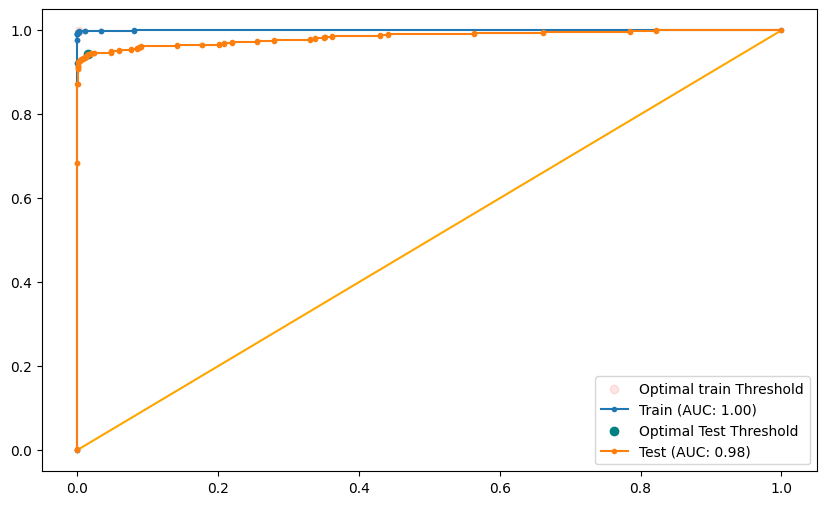

In [116]:
plt.figure(figsize=(10,6))

## plotting the ROC train curve
plt.scatter(fpr_train[idx_train], tpr_train[idx_train], marker='o', color='red', label='Optimal train Threshold')
plt.plot(fpr_train, tpr_train, marker='.', label=f'Train (AUC: {train_AUC:.2f})')
plt.plot([0,1], [0,1], color='orange')

## plotting the ROC test curve
plt.scatter(fpr_test[idx_test], tpr_test[idx_test], marker='o', color='teal', label='Optimal Test Threshold')
plt.plot(fpr_test, tpr_test, marker='.', label=f'Test (AUC: {test_AUC:.2f})')
plt.legend()
plt.show()


In [120]:
### using the threshold to predict y values
ytrain_roc_pred = (ytrain_clf_proba >= optimal_train).astype(int)
ytest_roc_pred = (ytest_clf_proba >= optimal_test).astype(int)

In [121]:
roc_train_report = classification_report(y_train, ytrain_roc_pred)
roc_test_report = classification_report(y_test, ytest_roc_pred)

In [124]:
print('Train: \n', roc_train_report)
print('Original Train: \n', original_train_report)
print('Test: \n', roc_test_report)
print('Original Test: \n', original_train_report)

Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6964
           1       0.98      1.00      0.99      1411

    accuracy                           1.00      8375
   macro avg       0.99      1.00      0.99      8375
weighted avg       1.00      1.00      1.00      8375

Original Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6964
           1       1.00      0.98      0.99      1411

    accuracy                           1.00      8375
   macro avg       1.00      0.99      0.99      8375
weighted avg       1.00      1.00      1.00      8375

Test: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2321
           1       0.92      0.94      0.93       471

    accuracy                           0.98      2792
   macro avg       0.95      0.96      0.96      2792
weighted avg       0.98      0.98      

### PRECISISON-RECALL CURVE

using the Stacking Model

In [126]:
from sklearn.metrics import precision_recall_curve, auc

train_precision, train_recall, train_threshold = precision_recall_curve(y_train, ytrain_clf_proba)
test_precision, test_recall, test_threshold = precision_recall_curve(y_test, ytest_clf_proba)

### get the AUC
train_auc_score = auc(train_recall, train_precision)
test_auc_score = auc(test_recall, test_precision)

### get the f1_scores
train_f1_score = 2 * (train_precision * train_recall) / (train_precision + train_recall)
test_f1_score = 2  * (test_precision * test_recall) / (test_precision + test_recall)


### get the index of the highest f1_score
train_threshold_index = np.argmax(train_f1_score)
test_threshold_index = np.argmax(test_f1_score)

### get the best threshold using its index

optimal_train_threshold_pr = train_threshold[train_threshold_index]
optimal_test_threshold = test_threshold[test_threshold_index]

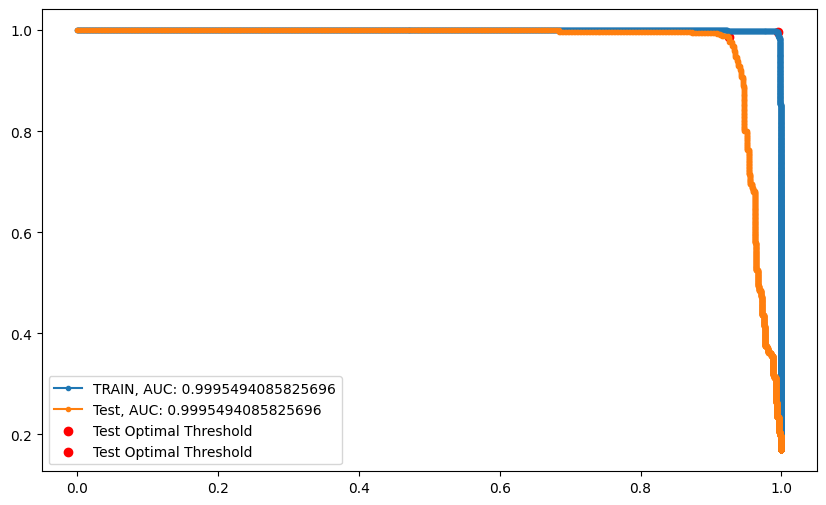

In [127]:
plt.figure(figsize=(10,6))

### plotting the PR curve
plt.plot(train_recall, train_precision, marker='.', label=f'TRAIN, AUC: {train_auc_score}')
plt.plot(test_recall, test_precision, marker='.', label=f'Test, AUC: {train_auc_score}')
plt.scatter(train_recall[train_threshold_index], train_precision[train_threshold_index], marker='o', color='red', label='Train Optimal Threshold')
plt.scatter(test_recall[test_threshold_index], test_precision[test_threshold_index], marker='o', color='red', label='Test Optimal Threshold')

plt.legend()

plt.show()

In [128]:
ytrain_pr_pred = (ytrain_clf_proba >= optimal_train_threshold_pr).astype(int)
ytest_pr_pred = (ytest_clf_proba >= optimal_test_threshold).astype(int)


In [129]:
pr_train_report = classification_report(y_train, ytrain_pr_pred)
pr_test_report = classification_report(y_test, ytest_pr_pred)

In [130]:
print('Train: \n', pr_train_report)
print('Original Train: \n', original_train_report)
print('Test: \n', pr_test_report)
print('Original Test: \n', original_train_report)

Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6964
           1       1.00      0.99      1.00      1411

    accuracy                           1.00      8375
   macro avg       1.00      1.00      1.00      8375
weighted avg       1.00      1.00      1.00      8375

Original Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6964
           1       1.00      0.98      0.99      1411

    accuracy                           1.00      8375
   macro avg       1.00      0.99      0.99      8375
weighted avg       1.00      1.00      1.00      8375

Test: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2321
           1       0.99      0.93      0.96       471

    accuracy                           0.99      2792
   macro avg       0.99      0.96      0.97      2792
weighted avg       0.99      0.99      

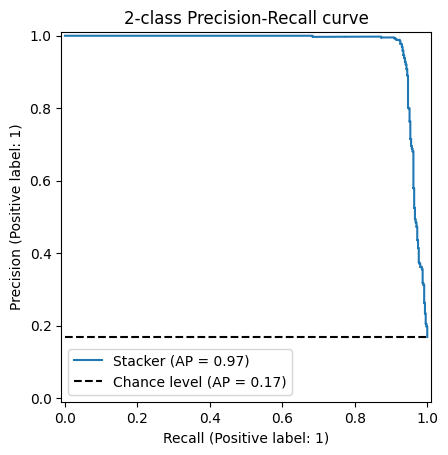

In [93]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Stacker", plot_chance_level=True
)

_ = display.ax_.set_title("2-class Precision-Recall curve")


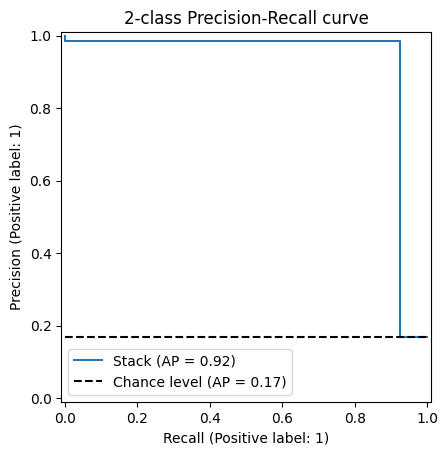

In [95]:
display = PrecisionRecallDisplay.from_predictions(
    y_test, ytest_clf_pred, name="Stack", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")